<a href="https://colab.research.google.com/github/b-richins92/Cancer_Prediction/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import requests
from zipfile import ZipFile
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
df = pd.read_csv('clean_df.csv')

In [5]:
df.head(10)

,Gender,Num of Bad Mental Health Days,Could Afford Doctor,Years Since Last Checkup,Exercise in Past 30 Days,Hours of Sleeping,Heart Attack,Heart Disease,Stroke,Asthma,...,"Ethnicity_Multiracial, non-Hispanic",Ethnicity_White,Education_attended_college,Education_did_not_graduate_high_school,Education_graduated_college,Education_graduated_high_school,BMI Category_normal_weight,BMI Category_obese,BMI Category_over_weight,BMI Category_underweight
0,0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,1.0,...,False,True,False,False,False,True,True,False,False,False
1,0,0.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,0.0,...,False,True,True,False,False,False,True,False,False,False
2,0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,True,False,False,False
3,0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,True,False
4,0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,True,False,False,False
5,1,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,True,False,False,True,False
6,0,5.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,True,False
7,0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,True,False,False,False
8,0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,1.0,0.0,...,False,True,True,False,False,False,True,False,False,False
9,1,0.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,False,True,False


In [ ]:
#df.isnull().sum()

In [6]:
df = df.drop(['General Health_Excellent', 'General Health_Fair',
       'General Health_Good', 'General Health_Poor',
       'General Health_Very good', 'CT Scan', 'CT for Cancer'], axis=1)

In [7]:
df.columns

Index(['Gender', 'Num of Bad Mental Health Days', 'Could Afford Doctor',
       'Years Since Last Checkup', 'Exercise in Past 30 Days',
       'Hours of Sleeping', 'Heart Attack', 'Heart Disease', 'Stroke',
       'Asthma', 'Cancer', 'Depression', 'Kidney Disease', 'Arthritis',
       'Diabetes', 'Married', 'Deaf', 'Blind', 'Mammogram', 'Smoked 100',
       'Smokeless Tobacco', 'Cigarettes per Day', 'Drinks per Session',
       'Flu Vaccine', 'Pneumonia Vaccine', 'Tetanus Last 10 Years',
       'Had COVID', 'Metropolitan', 'Weight in Pounds', 'Height in Inches',
       'Insulin', 'Ethnicity_American Indian and Alaskan Native',
       'Ethnicity_Asian and Pacific Islander', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Multiracial, non-Hispanic',
       'Ethnicity_White', 'Education_attended_college',
       'Education_did_not_graduate_high_school', 'Education_graduated_college',
       'Education_graduated_high_school', 'BMI Category_normal_weight',
       'BMI Category_ob

In [8]:
df = df.dropna()
important_column = ['Pneumonia Vaccine', 'Arthritis', 'Flu Vaccine', 'Married', 'Had COVID', 'Weight in Pounds', 'Ethnicity_White','Height in Inches','Metropolitan', 'Tetanus Last 10 Years', 'Cancer' ]
df = df[important_column]

In [9]:
X= df.drop('Cancer', axis=1)
y=df.Cancer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote=SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)


In [ ]:
# Create a model to evaluate
#model = RandomForestClassifier()
# Create RFE model and select top 10 features
#rfe = RFE(model, n_features_to_select=10)
#X_new = rfe.fit_transform(X_train, y_train)

In [15]:
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
#svm_model = SVC(kernel='rbf', probability=True, random_state=32)

# Train the models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
#svm_model.fit(X_train, y_train)

# Make predictions
y_train_pred_logistic = logistic_model.predict(X_train)
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

y_train_pred_rf = random_forest_model.predict(X_train)
y_pred_rf = random_forest_model.predict(X_test)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

#y_pred_svm = svm_model.predict(X_test)
#y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
accuracy_train_logistic = accuracy_score(y_train, y_train_pred_logistic)
#accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
precision_train_logistic = precision_score(y_train, y_train_pred_logistic)
recall_train_logistic = recall_score(y_train, y_train_pred_logistic)

accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf)
recall_train_rf = recall_score(y_train, y_train_pred_rf)

print("Training Accuracy:")
print(f'Logistic Accuracy: {accuracy_train_logistic:.2f}')
print(f'Logistic Precision : {precision_train_logistic:.2f}')
print(f'Logistic Recall : {recall_train_logistic:.2f}')

print(f'Random Forest Accuracy: {accuracy_train_rf:.2f}')
print(f'Random Forest Precision : {precision_train_rf:.2f}')
print(f'Random Forest Recall : {recall_train_rf:.2f}')

#print(f'SVM: {accuracy_train_svm:.2f}')

Training Accuracy:
Logistic Accuracy: 0.68
Logistic Precision : 0.67
Logistic Recall : 0.70
Random Forest Accuracy: 0.94
Random Forest Precision : 0.95
Random Forest Recall : 0.94


In [11]:
# Evaluate the models preformance
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

#accuracy_svm = accuracy_score(y_test, y_pred_svm)
#precision_svm = precision_score(y_test, y_pred_svm)
#recall_svm = recall_score(y_test, y_pred_svm)
#f1_svm = f1_score(y_test, y_pred_svm)
#roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

In [12]:
print("Logistic Regression:")
print(f'Accuracy: {accuracy_logistic:.2f}')
print(f'Precision: {precision_logistic:.2f}')
print(f'Recall: {recall_logistic:.2f}')
print(f'F1 Score: {f1_logistic:.2f}')
print(f'ROC AUC: {roc_auc_logistic:.2f}')
print("\nRandom Forest:")
print(f'Accuracy: {accuracy_rf:.2f}')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1 Score: {f1_rf:.2f}')
print(f'ROC AUC: {roc_auc_rf:.2f}')
print("\nSupport Vector Machine:")
#print(f'Accuracy: {accuracy_svm:.2f}')
#print(f'Precision: {precision_svm:.2f}')
#print(f'Recall: {recall_svm:.2f}')
#print(f'F1 Score: {f1_svm:.2f}')
#print(f'ROC AUC: {roc_auc_svm:.2f}')

Logistic Regression:
Accuracy: 0.66
Precision: 0.20
Recall: 0.65
F1 Score: 0.30
ROC AUC: 0.69

Random Forest:
Accuracy: 0.83
Precision: 0.19
Recall: 0.16
F1 Score: 0.18
ROC AUC: 0.60

Support Vector Machine:


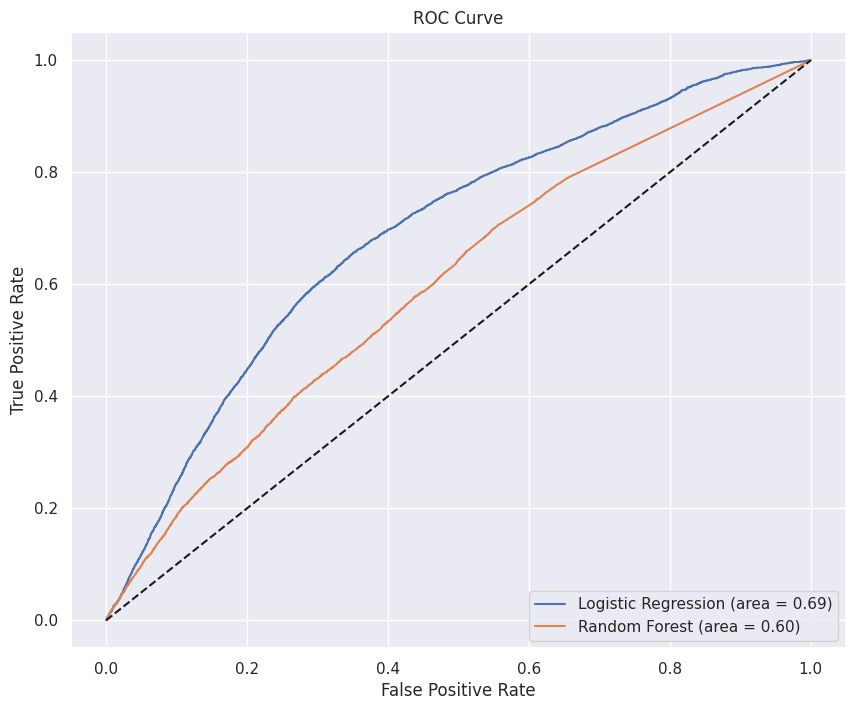

In [14]:
# Plot ROC curves
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
#fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (area = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
#plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()